<a href="https://colab.research.google.com/github/rahulrajpr/AdvancedHyperParameterOptimisation/blob/ScikitOptimize/ScikitOptimize_GradientBoostingProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Scikit Opt Gradient Boosting Process - Optimizes the hyperparamers from the distribution of hyperparameter combinations based on the metric choosen using a Gradient Boosting Regressor

- Steps

1. define the model
2. define parameter space
3. define objective function
4. run the search with dummy_minimize class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
dataset = load_breast_cancer()
data = dataset.data
columns = dataset.feature_names
df = pd.DataFrame(data = data, columns = columns)
df['target'] = dataset.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
X = df.drop('target', axis =1)
y = df['target']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test, y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100, stratify = y)

Define the model object

In [7]:
from xgboost import XGBClassifier

In [8]:
# non-skleran model object
xgb = XGBClassifier(random_state = 100)

Parameter list --

max_depth: int = 3, learning_rate: float = 0.1, n_estimators: int = 100, verbosity: int = 1, silent: Any | None = None, objective: str = "binary:logistic", booster: str = 'gbtree', n_jobs: int = 1, nthread: Any | None = None, gamma: int = 0, min_child_weight: int = 1, max_delta_step: int = 0, subsample: int = 1, colsample_bytree: int = 1, colsample_bylevel: int = 1, colsample_bynode: int = 1, reg_alpha: int = 0, reg_lambda: int = 1, scale_pos_weight: int = 1, base_score: float = 0.5, random_state: int = 0, seed: Any | None = None, missing: Any | None = None, **kwargs: Any) -> None
Implementation of the scikit-learn API for XGBoost classification.

Define the parameter space

In [9]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 3.0 MB/s 


In [10]:
from skopt.space import Integer,Real,Categorical

In [11]:
params_grid = [Integer(low = 10, high = 120, prior = 'uniform', name = 'n_estimators'),
          Integer(low = 1, high = 8, prior = 'uniform', name = 'max_depth'),
          Real(low = 0.001, high = 0.1, prior = 'log-uniform', name = 'learning_rate'),
          Real(low = 0.001, high = 0.999, prior = 'log-uniform', name = 'min_samples_splits'),
          Categorical(['exponential','deviance'], name = 'loss')]

create the objective function

In [12]:
from skopt.utils import use_named_args

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
@use_named_args(params_grid)
def objective(**params):

  xgb.set_params(**params)

  scores = cross_val_score(estimator = xgb,
                           X = X_train,
                           y = y_train,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
  
  mean_score = np.mean(scores)
  return -mean_score

Run the search using the gbrt_minimize

In [15]:
from skopt import gbrt_minimize

In [16]:
gbrt_ = gbrt_minimize(func = objective,
                      dimensions = params_grid,
                      n_calls = 50,
                      n_initial_points = 5,
                      acq_func = 'EI',
                      verbose = 1,
                      random_state = 100)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.8456
Function value obtained: -0.8945
Current minimum: -0.8945
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.5311
Function value obtained: -0.9296
Current minimum: -0.9296
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.2028
Function value obtained: -0.9497
Current minimum: -0.9497
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.1476
Function value obtained: -0.9371
Current minimum: -0.9497
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.2499
Function value obtained: -0.9396
Current minimum: -0.9497
Iteration No: 6 started. 

Explore the search results

In [17]:
# accuracy
gbrt_.fun

-0.9647784810126583

In [18]:
# best parameters
gbrt_.x

[91, 7, 0.08093276735058283, 0.001061958896590194, 'exponential']

In [19]:
hyper_parameters = ['n_estimators','max_depth','learning_rate','min_samples_split','loss']

In [20]:
# hyperparameter combinations
gbrt_.x_iters

[[18, 1, 0.0036036181878858747, 0.018765853187758735, 'deviance'],
 [104, 5, 0.001750403776179903, 0.10279116915922727, 'deviance'],
 [34, 8, 0.06062390517439188, 0.0042414608781566, 'exponential'],
 [19, 6, 0.0027503944643483894, 0.8618786655442375, 'deviance'],
 [11, 6, 0.042899230036160536, 0.0066389921151654525, 'exponential'],
 [11, 2, 0.0992106766639873, 0.0013991985621780029, 'exponential'],
 [14, 1, 0.09210611171966027, 0.002079657085072974, 'exponential'],
 [12, 1, 0.0045306389559153235, 0.02723334789566428, 'deviance'],
 [63, 8, 0.08499121596020912, 0.0017729016060427367, 'exponential'],
 [52, 8, 0.05436851134417421, 0.0017846014652793014, 'exponential'],
 [63, 8, 0.08154132237655261, 0.001037665199966924, 'exponential'],
 [81, 7, 0.07140014314593612, 0.0010245223743556274, 'exponential'],
 [45, 8, 0.07823346124440209, 0.0010359299669159073, 'deviance'],
 [105, 1, 0.0014285041360669094, 0.001006367863693363, 'deviance'],
 [78, 8, 0.08075868244471138, 0.001130776605470219, 'ex

In [21]:
# accuracy (metric) in each iterations
gbrt_.func_vals

array([-0.89449367, -0.92955696, -0.9496519 , -0.93712025, -0.93958861,
       -0.94212025, -0.91699367, -0.89449367, -0.95471519, -0.9446519 ,
       -0.95974684, -0.96224684, -0.95974684, -0.90446203, -0.96227848,
       -0.95971519, -0.96224684, -0.90946203, -0.9496519 , -0.96224684,
       -0.95721519, -0.96221519, -0.9471519 , -0.95721519, -0.96477848,
       -0.96224684, -0.89449367, -0.89449367, -0.96224684, -0.95718354,
       -0.95977848, -0.91702532, -0.95474684, -0.95971519, -0.95721519,
       -0.94971519, -0.93212025, -0.89446203, -0.92702532, -0.95977848,
       -0.95221519, -0.93712025, -0.95977848, -0.92455696, -0.95977848,
       -0.92458861, -0.9496519 , -0.90446203, -0.94721519, -0.91199367])

In [22]:
hyper_combo = pd.DataFrame(gbrt_.x_iters)
metric = pd.DataFrame(abs(gbrt_.func_vals))
tmp = pd.concat([hyper_combo,metric], axis = 1)
tmp.columns = hyper_parameters + ['metric']
tmp.sort_values(by = 'metric', ascending = False, inplace = True)
tmp.head()

,n_estimators,max_depth,learning_rate,min_samples_split,loss,metric
24,91,7,0.080933,0.001062,exponential,0.964778
14,78,8,0.080759,0.001131,exponential,0.962278
19,111,7,0.079273,0.001084,deviance,0.962247
16,80,7,0.082703,0.001254,exponential,0.962247
11,81,7,0.071400,0.001025,exponential,0.962247


In [23]:
best_params = tmp.drop('metric', axis = 1).iloc[0,:].to_dict()
best_params

{'n_estimators': 91,
 'max_depth': 7,
 'learning_rate': 0.08093276735058283,
 'min_samples_split': 0.001061958896590194,
 'loss': 'exponential'}

Lets Explor the convergence, evalations plots

In [24]:
from skopt.plots import plot_convergence,plot_evaluations,plot_objective

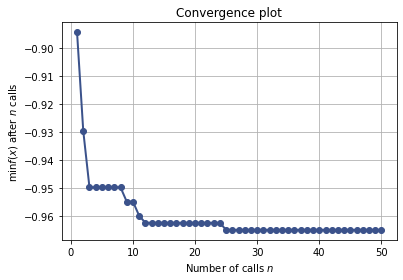

In [25]:
plot_convergence(gbrt_)
plt.show()

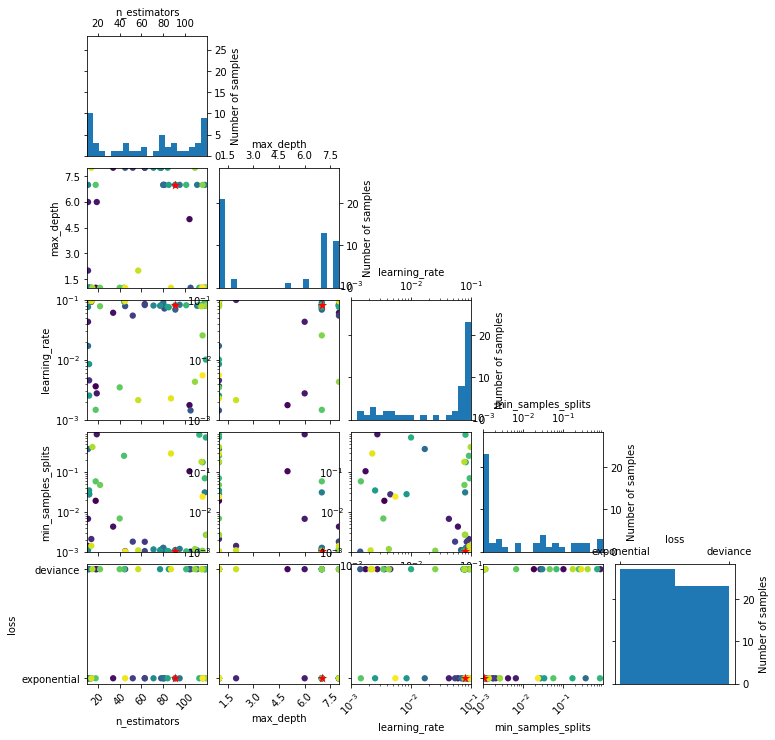

In [26]:
plot_evaluations(gbrt_)
plt.show()

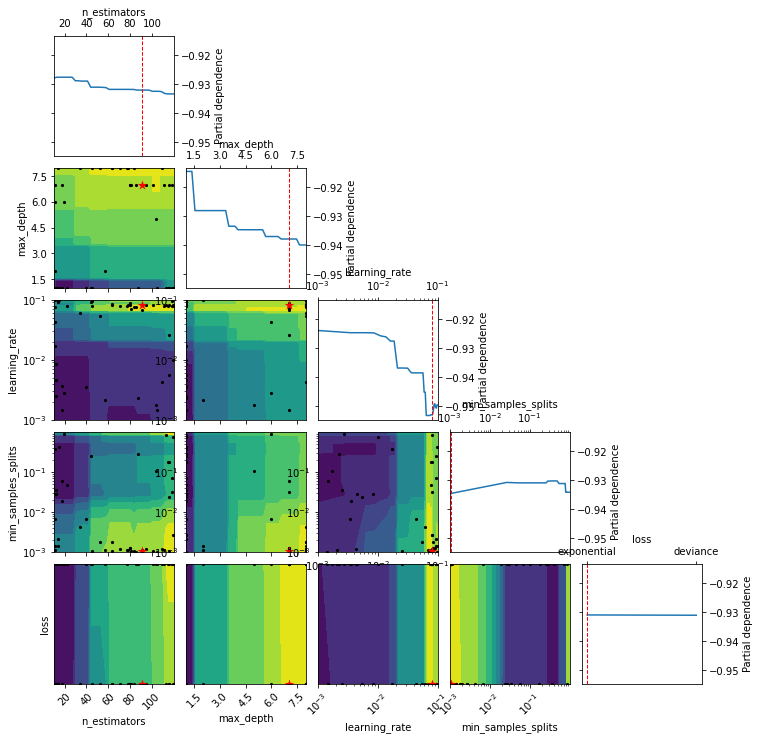

In [27]:
plot_objective(gbrt_)
plt.show()

Generate the final model

In [28]:
model = XGBClassifier(n_estimators = best_params['n_estimators'],
                      max_depth = best_params['max_depth'],
                      min_samples_split = best_params['min_samples_split'],
                      learning_rate = best_params['learning_rate'],
                      loss = best_params['loss'])

In [29]:
model.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(learning_rate=0.08093276735058283, loss='exponential',
              max_depth=7, min_samples_split=0.001061958896590194,
              n_estimators=91)>

In [30]:
model.fit(X_train,y_train)

XGBClassifier(learning_rate=0.08093276735058283, loss='exponential',
              max_depth=7, min_samples_split=0.001061958896590194,
              n_estimators=91)

Evaluate the final model

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
print('train accuracy : ',accuracy_score(y_train,model.predict(X_train)))
print('test accuracy : ',accuracy_score(y_test,model.predict(X_test)))

train accuracy :  1.0
test accuracy :  0.9766081871345029
